**Title: What Factors Determine the Popularity of Computer Games?**


**Abstract**: For our project, we were interested to see whether certain computer games metrics were related. Specifically, we wanted to see if any correlations existed between a game’s price, rating, total sales, and how much time the average user spends playing that game. 

**Packages Imported**: We imported several packages, including: (1) pandas – an open source software library used for data manipulation and analysis within Python; (2) matplotlib – a plotting library for Python that allowed us to generate our graphs; and (3) Beautiful Soup – a Python library for parsing HTML documents and extracting data (i.e. web scraping). Beautiful Soup is what enabled us to gather data from each game’s specific URL within each of our data sources listed.

**Data Sources**: From metacritic.com, a website that aggregates user and professional critic reviews of computer games, we pulled (1) scores (i.e. user ratings) for 251 computer games we selected at random from the Metacritic database. We then gathered information on each game’s: (2) number of owners (i.e. copies sold), (3) price, and (4) total average playtime from steamspy.com, a stats service that automatically gathers and organizes data from Steam, a digital software platform used to distribute games and related media online.


In [43]:
from bs4 import BeautifulSoup
import urllib
import pandas as pd
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt         # pyplot module
from urllib.request import Request, urlopen
%matplotlib inline

In [44]:
df = pd.read_csv('Steam_DB_Info_Appsv2.csv',encoding='iso-8859-1',error_bad_lines=False)
#df.columns.append('Score')
dfname = df['NAME']
for n in range(len(dfname)):
    game_name = dfname[n]  ##just for example
    game_name=game_name.replace(' ','%20')
df

,APPID,NAME,SCORE
0,362300,H1Z1: Just Survive Test Server,NaN
1,340820,Yelaxot,NaN
2,444020,Coffee Pot Terrarium,NaN
3,463290,Kismet,NaN
4,359400,Why Am I Dead At Sea,NaN
5,439700,H1Z1: King of the Kill Test Server,NaN
6,387240,Steel Rain,NaN
7,407060,AltspaceVR,NaN
8,362620,Software Inc.,NaN
9,448300,Logic Missile,NaN


**Creating the Data Set**: In order to complete this project, we had complete a significant amount of webscraping. Using the data we scraped from metacritic.com and steamspy.com, we created a comprehensive dataframe that consisted of each game and its score, number of owners, price, and total playtime. To do this, we wrote code so that it would scroll through our list of games, which was contained in a .csv that we imported, and scrape data from each game’s unique URLs on both sites (e.g. 'http://www.metacritic.com/search/all/'+game_name+'/results'). One early issue we had was that some of the games in our .csv file contained unknown titles and the trademark symbol next to them, so we had to remove those so as not to cause issues in Python.

Below is the code we used to complete the webscraping, however we have included it in a text cell because of the tremendous amount of time it takes to scrape the data and build the dataframe. In short, Our code was built to loop through the list of games for one metric at a time, and after each loop was completed, that metric would be appended as part of a new column of the dataframe in the corresponding row location related to the data being scraped.  One obstacle we confronted was that some games did not have a metacritic user rating, so we included language in our code that would give us a “NAN” (i.e. not a number) output if no rating was available. Additionally, the number of copies sold was returned as a range (e.g. ‘: 69,004,323 ± 176,095’). Thus, we wrote language into our code that would remove everything after and including the “±” symbol. Similarly, the number of digits returned in the “copies sold” metric was varied (i.e. some games sold in the hundreds of thousands, while other games sold in the tens of millions); so again, we added code that would find “spaces” in the number of games sold and return the number in the correct format, regardless of length. 

The "df" referred to in the cell below and from hereon out is the dataframe that was saved as a .csv on our desktop.


url_to_scrape = 'http://www.metacritic.com/search/all/'+game_name+'/results'
    try:
        req = Request(url_to_scrape, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
    except Exception as e:
        print ('something went wrong')
        print (e)
    print (url_to_scrape)
    html = BeautifulSoup(webpage, 'html.parser')
    all_spans = html.find_all('span')
    for span in all_spans:
        if span.get('class') is not None and 'metascore_w' in span.get('class'):
            #print (span)
            score = int(span.text)
            print (score)
            df.loc[(df.NAME== dfname[n]) ,'SCORE'] = score
            break
for n in range(len(dfname)):
    game_name = dfname[n]  ##just for example
    game_name=game_name.replace(' ','+')
url_to_scrape = 'http://steamspy.com/search.php?s='+game_name+''
    try:
        req = Request(url_to_scrape, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
    except Exception as e:
        print ('something went wrong')
        print (e)
    print (url_to_scrape)
    html = BeautifulSoup(webpage, 'html.parser')
    all_strong = html.find_all('strong')
    for strongowners in all_strong:
        if strongowners.text == 'Owners':
            print(strongowners.next.next)
            ownersnum = strongowners.next.next
            ownersnum = ownersnum.replace(': ','')
            ownersnum = ownersnum.replace(',','')
            ownersnum, sep, tail = ownersnum.partition(' ±')
            ownersnum = int(ownersnum)
            break
    df.loc[(df.NAME== dfname[n]) ,'# of Owners'] = ownersnum

for n in range(len(dfname)):
    game_name = dfname[n]  ##just for example
    game_name=game_name.replace(' ','+')
url_to_scrape = 'http://steamspy.com/search.php?s='+game_name+''
    try:
        req = Request(url_to_scrape, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
    except Exception as e:
        print ('something went wrong')
        print (e)
    print (url_to_scrape)
    html = BeautifulSoup(webpage, 'html.parser')
    all_strong = html.find_all('strong')
    for strongprice in all_strong:
        if strongprice.text == 'Price:':
            print(strongprice.next.next)
            price = strongprice.next.next
            price = price.replace('$','')
            price = float(price)
            break
    df.loc[(df.NAME== dfname[n]) ,'Price USD'] = price

for n in range(len(dfapp)):
    game_name = dfapp[n]  ##just for example
    game_name=game_name.replace(' ','+')
url_to_scrape = 'http://steamspy.com/app/'+str(game_name)
    try:
        req = Request(url_to_scrape, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
    except Exception as e:
        print ('something went wrong')
        print (e)
    print (url_to_scrape)
    html = BeautifulSoup(webpage, 'html.parser')
    all_strong = html.find_all('strong')
    #print (all_strong)
    play=0
    for strongplay in all_strong:
        #print (strongplay)
        if 'Playtime' in strongplay.text :
            found =True
            print(strongplay.next.next)
            play = strongplay.next.next
            play = play.replace(':','.')
            play, sep, tail = play.partition(' (average)')
            play = float(play)
            break
    df.loc[(df.NAME== dfname[n]) ,'Total Playtime (hrs)'] = play


In [45]:
df = pd.read_csv('/Users/Jeff/Desktop/ Spring 2016 /Data Bootcamp/Mandelup-Soffer-Data-1.2.csv',encoding='iso-8859-1',error_bad_lines=False)
df = df.rename(columns = {'Unnamed: 0':'Unnamed', 'APPID': 'AppID', 'NAME': 'Name', 'SCORE':'Score', 
                            'Total Playtime (hrs)': 'Total_Playtime_hrs', '# of Owners': 'Number_of_Owners', 'Price USD': 'Price_USD'})

df = df.set_index(['Name'])
df_2 = df.drop(['Unnamed', 'AppID'], axis = 1) 
# df_2 = df.drop(['Unnamed: 0', 'APPID', 'SCORE', 'Total Playtime (hrs)', '# of Owners', 'Price USD'], axis = 1) 
# for df_2 where we'll be graphing, drop all but two of the variables to generate the desired graph

df

,Unnamed,AppID,Score,Total_Playtime_hrs,Number_of_Owners,Price_USD
Name,,,,,,
H1Z1: Just Survive Test Server,0,362300,NaN,1.10,396249,19.99
Yelaxot,1,340820,NaN,2.19,7599,11.99
Coffee Pot Terrarium,2,444020,NaN,0.00,479,14.99
Kismet,3,463290,NaN,0.00,473,14.99
Why Am I Dead At Sea,4,359400,NaN,5.37,2216,9.99
H1Z1: King of the Kill Test Server,5,439700,NaN,0.49,2541976,19.99
Steel Rain,6,387240,NaN,2.55,10765,9.99
AltspaceVR,7,407060,NaN,0.41,14564,9.99
Software Inc.,8,362620,NaN,6.37,38628,13.99


We then wrote code that enabled us to group our games into “Price Buckets,” namely, those games whose price was: (a) x < 5; (b) 5 < x < 15; (c) 15 < x < 30; and (d) 30 < x. This provided us with a useful means for organizing 251 individual games into 4 groups based on a common variable.  These buckets were determined based on industry knowledge that these are typical cutoff points for market segmentation.

In [46]:
between_5_and_15 = df_2['Price_USD']<15
df_2.ix[between_5_and_15,'Price_Bucket']="between_5_and_15"

less_than_5 = df_2['Price_USD']<5
df_2.ix[less_than_5,'Price_Bucket']="less_than_5"

between_15_and_30 = 15<df_2['Price_USD']
df_2.ix[between_15_and_30,'Price_Bucket']="between_15_and_30"

greater_than_30 = 30<df_2['Price_USD']
df_2.ix[greater_than_30,'Price_Bucket']="greater_than_30"

df_2



,Score,Total_Playtime_hrs,Number_of_Owners,Price_USD,Price_Bucket
Name,,,,,
H1Z1: Just Survive Test Server,NaN,1.10,396249,19.99,between_15_and_30
Yelaxot,NaN,2.19,7599,11.99,between_5_and_15
Coffee Pot Terrarium,NaN,0.00,479,14.99,between_5_and_15
Kismet,NaN,0.00,473,14.99,between_5_and_15
Why Am I Dead At Sea,NaN,5.37,2216,9.99,between_5_and_15
H1Z1: King of the Kill Test Server,NaN,0.49,2541976,19.99,between_15_and_30
Steel Rain,NaN,2.55,10765,9.99,between_5_and_15
AltspaceVR,NaN,0.41,14564,9.99,between_5_and_15
Software Inc.,NaN,6.37,38628,13.99,between_5_and_15


In the cell below, we (1) set Price_Bucket as the index for our dataframe; (2) reorder the index so that each Price_Bucket is listed in ascending order; and (3) created a new dataframe (means_df) that consisted of the average Score, Total_Playtime_hrs, Number_of_Owners, and Price_USD for each Price_Bucket.

In [47]:
df_2_reset = df_2.reset_index()
df_2 = df_2.set_index(["Price_Bucket"])
df_2.index = pd.CategoricalIndex(df_2.index,['less_than_5', 'between_5_and_15', 'between_15_and_30', 'greater_than_30'])
df_2 = df_2.sort_index()
means_df = df_2.groupby(df_2.index).mean()
means_df

,Score,Total_Playtime_hrs,Number_of_Owners,Price_USD
less_than_5,65.000000,3.546607,2006759,3.684643
between_5_and_15,76.520000,1.766400,287030,10.982000
between_15_and_30,71.944444,4.412931,668213,21.964310
greater_than_30,77.750000,8.627500,463793,59.573333


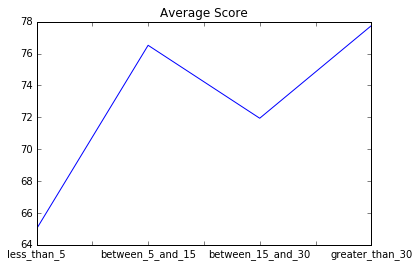

In [48]:
means_df.Score.plot(kind = 'line', title = "Average Score")

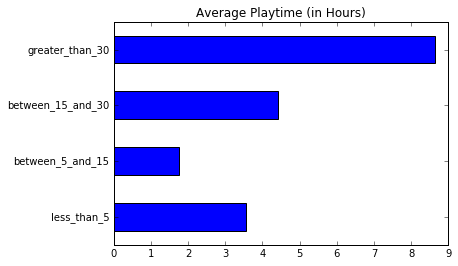

In [49]:
means_df.Total_Playtime_hrs.plot(kind='barh', title = "Average Playtime (in Hours)")

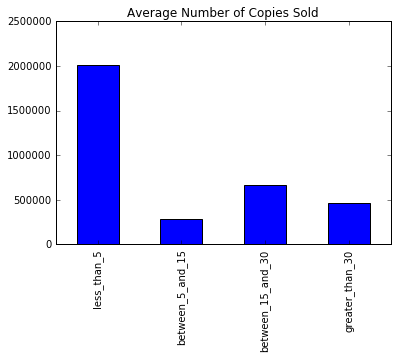

In [50]:
means_df.Number_of_Owners.plot(kind='bar', title = "Average Number of Copies Sold")

**Conclusions**:

First, it is important to note that our Price Buckets were different sizes: 56 games cost less than 5; 125 cost between 5 and 15; 58 cost between 15 and 30; and 12 games cost more than 30. In other words, about 72% of games included in our analysis were under 15.

That said, we found that there was indeed a correlation between price and score; specifically, the games that were most expensive (i.e. greater than 30) had the highest mean score. Similarly, the games in the least expensive bucket (i.e. less than 5) had the lowest mean score. We were surprised to discover, however, that this was not wholly linear, as the games that cost between 5 and 15 had a higher mean score than those that cost between 15 and 30.  Further analysis showed that this could be explained by the presence of a seperate pricing model for lower cost games whereby additional content was sold piecemeal within the game.  The lower initial entry price is therefore to increase copies sold (exposure) and utilize a network effect while purchasing all of the content would place the game closer or above the $30+ price range.

Those games that fell in the most expensive price bucket also had the highest average total playtime (8.63 hours), which was almost double the next highest group (4.41 hours), the 15 < x < 30 price bucket. However, we are unable to determine from the data whether the most expensive games are being played for more hours than other games because they are better games, or whether users feel obligated to spend more time playing those games because they invested more money in them. We would presume the former, but the data is not conclusive.  We also noticed a bump in games below the 5 dollar price range.  We believe this is because it allows access to a new segment of users with different values than those which participate in the $5-30+ range that are less motivated by product quality or as mentioned earlier find value in the product and contribute to the products success via network effect but cannot afford to spend more than the initial buy-in.

Finally, the average number of copies sold for games that were under 5 was two million, while none of the other price buckets had a mean number of copies sold that was higher than 700,000. Thus, we were able to conclude that if a game cost less than $5 it would sell many copies, but was not any more likely to sell more copies priced at $10 than $30+.  Therefore, while prices between 5 and 30 are indicative of lower quality based on our data, games priced below 5 dollars have a much wider variety of quality because they rely on in-applicationo purchases and network effect to drive revenue and therefore the initial buy-in price is not indiciative of the value of the product.